In [14]:
from dotenv import load_dotenv
import os

load_dotenv()

data_path = os.getenv('DATA_PATH')
ambient_path = f"{data_path}/ambient"
attacks_path = f"{data_path}/attacks"

# Define the file paths
file_path_malicious = f"{attacks_path}/correlated_signal_attack_1.log"
file_path_clean = f"{attacks_path}/correlated_signal_attack_1_masquerade.log"

#file_path_malicious = f"{attacks_path}/correlated_signal_attack_2.log"
#file_path_clean = f"{attacks_path}/correlated_signal_attack_2_masquerade.log"

#file_path_malicious = f"{attacks_path}/correlated_signal_attack_3.log"
#file_path_clean = f"{attacks_path}/correlated_signal_attack_3_masquerade.log"

# For this case, the average time between attack CANIDs is in the mid-range (not very small or very large)
#file_path_malicious = f"{attacks_path}/max_engine_coolant_temp_attack.log"
#file_path_clean = f"{attacks_path}/max_engine_coolant_temp_attack_masquerade.log"

# For this case, the average time between attack CANIDs perfectly matches other IDs
#file_path_malicious = f"{attacks_path}/max_speedometer_attack_1.log"
#file_path_clean = f"{attacks_path}/max_speedometer_attack_1_masquerade.log"

In [38]:
# Open both files for reading
with open(file_path_malicious, 'r') as file_malicious, open(file_path_clean, 'r') as file_clean:
    # Initialize a counter for malicious lines
    malicious_line_counter = 1

    # Set to store unique malicious CAN IDs
    malicious_can_ids = []
    clean_can_ids = []

    # Loop through both files line by line
    while True:
        # Read one line from each file
        line_malicious = file_malicious.readline()
        line_clean = file_clean.readline()

        # Break the loop if we reach the end of either file
        if not line_malicious or not line_clean:
            break

        # Ignore the timestamps by taking the substring from the 24th character onwards
        line_malicious_no_timestamp = line_malicious[24:]
        line_clean_no_timestamp = line_clean[24:]

        # If the lines (without timestamps) are not equal, the line from the malicious file is a malicious line
        if line_malicious_no_timestamp != line_clean_no_timestamp:
            print(f'{malicious_line_counter}. {line_malicious.strip()}')
            malicious_line_counter += 1
            # Extract the CAN ID from the malicious line and add it to the set
            can_id = line_malicious.split()[2].split('#')[0]
            malicious_can_ids.append(can_id)
            # Read the next line from the malicious file to re-sync the files
            line_malicious = file_malicious.readline()
        else:
            # Extract the CAN ID from the clean line and add it to the set
            can_id = line_clean.split()[2].split('#')[0]
            clean_can_ids.append(can_id)


1. (1030000009.196896) can0 6E0#03AF03A603A403A6
2. (1030000009.208806) can0 6E0#03AF03A903A503A6
3. (1030000009.217197) can0 6E0#03AF03AB03A303A6
4. (1030000009.229406) can0 6E0#03B103AB03A403A4
5. (1030000009.237501) can0 6E0#03AC03A603A503A3
6. (1030000009.248814) can0 6E0#03AD03A8039E039F
7. (1030000009.256899) can0 6E0#03AF03A7039B039B
8. (1030000009.269152) can0 6E0#03B103AD039A0397
9. (1030000009.277275) can0 6E0#03B103AE039C0399
10. (1030000009.288818) can0 6E0#03AC03A9039E039B
11. (1030000009.296982) can0 6E0#03AC03A6039E039A
12. (1030000009.308821) can0 6E0#03AF03A4039D039C
13. (1030000009.317141) can0 6E0#03B003AB039A039B
14. (1030000009.328827) can0 6E0#03B503A803990399
15. (1030000009.337198) can0 6E0#03B103AB039A039A
16. (1030000009.348842) can0 6E0#03AB03A6039B039A
17. (1030000009.357956) can0 6E0#03AA03A9039A0398
18. (1030000009.369181) can0 6E0#03AD03AA03980399
19. (1030000009.377321) can0 6E0#03B103AD03980399
20. (1030000009.388822) can0 6E0#03B503AD03990398
21. (1030

In [71]:
#print(malicious_can_ids[0])
#print(clean_can_ids)
malicious_timestamps = []
clean_timestamps = []
clean_can_id_index = 0 #determines which clean CANID to plot, when 0, you'll plot 354

with open(file_path_malicious, 'r') as file_malicious:
    # Loop through both files line by line
    while True:
        # Read one line from each file
        line_malicious = file_malicious.readline()

        # Break the loop if we reach the end of either file
        if not line_malicious:
            break
        
        line_malicious_CANID = line_malicious[25:28]
        #print(line_malicious_CANID)
        if line_malicious_CANID == malicious_can_ids[0]:
            #print(line_malicious_CANID)
            malicious_timestamps.append(line_malicious[1:18]) #add malicious timestamps to a list
        if line_malicious_CANID == clean_can_ids[clean_can_id_index]:
            clean_timestamps.append(line_malicious[1:18]) #add clean timestamps to a list

#print(clean_timestamps)
print(len(malicious_timestamps))
        

5397


5397
5396
[1030000000.018415, 1030000000.033092, 1030000000.038454, 1030000000.04988, 1030000000.058977, 1030000000.074538, 1030000000.078605, 1030000000.091083, 1030000000.098374, 1030000000.110961, 1030000000.11827, 1030000000.129955, 1030000000.138292, 1030000000.150831, 1030000000.158956, 1030000000.170412, 1030000000.178558, 1030000000.189973, 1030000000.198281, 1030000000.209991, 1030000000.218281, 1030000000.233444, 1030000000.238545, 1030000000.250002, 1030000000.258788, 1030000000.270393, 1030000000.278517, 1030000000.289979, 1030000000.298291, 1030000000.309976, 1030000000.318308, 1030000000.330868, 1030000000.338348, 1030000000.349971, 1030000000.35876, 1030000000.369948, 1030000000.378072, 1030000000.389986, 1030000000.398394, 1030000000.410015, 1030000000.418452, 1030000000.433073, 1030000000.438464, 1030000000.450196, 1030000000.4588, 1030000000.470484, 1030000000.478608, 1030000000.490028, 1030000000.498312, 1030000000.510046, 1030000000.518309, 1030000000.534033, 103000

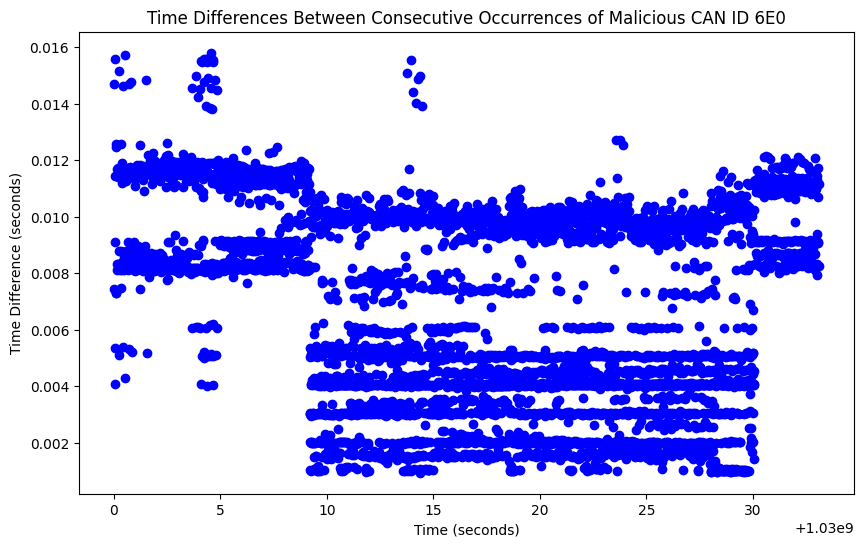

In [69]:
import matplotlib.pyplot as plt

# Convert string timestamps to floats
malicious_timestamps = [float(timestamp) for timestamp in malicious_timestamps]
print(len(malicious_timestamps))

# Calculate the time differences
time_diffs = [malicious_timestamps[i + 1] - malicious_timestamps[i] for i in range(len(malicious_timestamps) - 1)]
print(len(time_diffs))
# Get the x-values (timestamps of the second occurrence in each pair)
x_values = malicious_timestamps[1:]
print(x_values)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the time differences
#plt.plot(x_values, time_diffs, linewidth=0.1)
plt.scatter(x_values, time_diffs, color='blue')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Time Difference (seconds)')
plt.title(f'Time Differences Between Consecutive Occurrences of Malicious CAN ID {malicious_can_ids[0]}')

# Show the plot
plt.show()

3311
[1030000000.010978, 1030000000.020429, 1030000000.031042, 1030000000.040467, 1030000000.050906, 1030000000.059999, 1030000000.070499, 1030000000.080086, 1030000000.09108, 1030000000.099953, 1030000000.110959, 1030000000.120307, 1030000000.130959, 1030000000.140678, 1030000000.150833, 1030000000.160997, 1030000000.170414, 1030000000.17991, 1030000000.190992, 1030000000.200029, 1030000000.211009, 1030000000.220301, 1030000000.230365, 1030000000.240854, 1030000000.251041, 1030000000.260808, 1030000000.270395, 1030000000.28004, 1030000000.290977, 1030000000.300308, 1030000000.310976, 1030000000.320347, 1030000000.33087, 1030000000.339947, 1030000000.350991, 1030000000.360801, 1030000000.370967, 1030000000.379923, 1030000000.390986, 1030000000.400054, 1030000000.411015, 1030000000.420466, 1030000000.431032, 1030000000.440083, 1030000000.451212, 1030000000.460815, 1030000000.470486, 1030000000.480067, 1030000000.491008, 1030000000.49993, 1030000000.511045, 1030000000.520326, 1030000000.

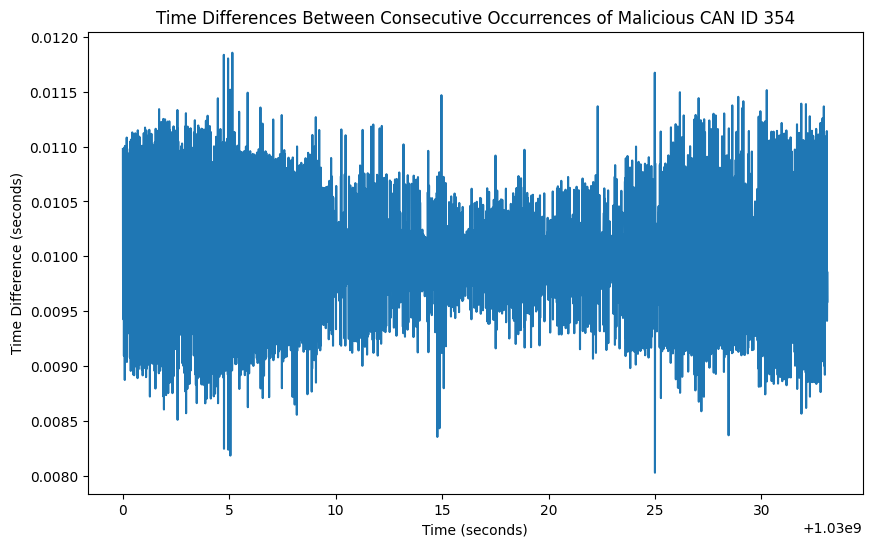

In [70]:
import matplotlib.pyplot as plt

# Convert string timestamps to floats
clean_timestamps = [float(timestamp) for timestamp in clean_timestamps]
print(len(clean_timestamps))

# Calculate the time differences
time_diffs = [clean_timestamps[i + 1] - clean_timestamps[i] for i in range(len(clean_timestamps) - 1)]

# Get the x-values (timestamps of the second occurrence in each pair)
x_values = clean_timestamps[1:]
print(x_values)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the time differences
plt.plot(x_values, time_diffs)

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Time Difference (seconds)')
plt.title(f'Time Differences Between Consecutive Occurrences of Normal CAN ID {clean_can_ids[clean_can_id_index]}')

# Show the plot
plt.show()